In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### 2.3 線性模型實戰

$$
y\,\,=\,\,1.477x+0.089+\epsilon 
\\
\epsilon =N\left( 0, 0.01^2 \right) 
\\
x\in U\left( -10, 10 \right) 
$$

In [2]:
# 採樣數據
x = np.random.uniform(low=-10, high=10, size=100)
e = np.random.normal(loc=0, scale=0.01**2, size=100)
y = 1.477*x + 0.089 + e

data = np.vstack([x, y]).T

In [3]:
# 計算誤差
def mse(b, w, data):
    y_true = data[:, 1]
    y_pred = w*data[:, 0] + b
    return mean_squared_error(y_pred, y_true)

In [4]:
def step_gradient(now_b, now_w, data, lr):
    feature = data[:, 0]
    y_true = data[:, 1]
    
    dL_db = np.mean( 2*( (now_w*feature + now_b) - y_true ) )# (2.3)
    dL_dw = np.mean( 2 * feature * ( (now_w*feature + now_b) - y_true ) )# (2.2)
    
    new_b = now_b - (lr * dL_db)# (2.1) 
    new_w = now_w - (lr * dL_dw)# (2.1)
    
    return new_b, new_w

In [5]:
def gradient_descent(data, init_b, init_w, lr, num_epoch):
    b = init_b
    w = init_w
    
    for epoch in range(num_epoch):
        b, w = step_gradient(b, w, data, lr)
        loss = mse(b, w, data)
        history[epoch] = loss
        if epoch%50==0:
            print("iteration:{epoch}, loss:{loss:.2f}, w:{w:.2f}, b:{b:.2f}".format(epoch=epoch, loss=loss, w=w, b=b))
        
    return b, w

In [6]:
lr = 0.01
init_b = 0
init_w = 0.0
num_epoch = 1000
history = np.zeros(num_epoch)

b, w = gradient_descent(data, init_b, init_w, lr, num_epoch)

iteration:0, loss:5.81, w:1.08, b:0.01
iteration:50, loss:0.00, w:1.48, b:0.06
iteration:100, loss:0.00, w:1.48, b:0.08
iteration:150, loss:0.00, w:1.48, b:0.09
iteration:200, loss:0.00, w:1.48, b:0.09
iteration:250, loss:0.00, w:1.48, b:0.09
iteration:300, loss:0.00, w:1.48, b:0.09
iteration:350, loss:0.00, w:1.48, b:0.09
iteration:400, loss:0.00, w:1.48, b:0.09
iteration:450, loss:0.00, w:1.48, b:0.09
iteration:500, loss:0.00, w:1.48, b:0.09
iteration:550, loss:0.00, w:1.48, b:0.09
iteration:600, loss:0.00, w:1.48, b:0.09
iteration:650, loss:0.00, w:1.48, b:0.09
iteration:700, loss:0.00, w:1.48, b:0.09
iteration:750, loss:0.00, w:1.48, b:0.09
iteration:800, loss:0.00, w:1.48, b:0.09
iteration:850, loss:0.00, w:1.48, b:0.09
iteration:900, loss:0.00, w:1.48, b:0.09
iteration:950, loss:0.00, w:1.48, b:0.09


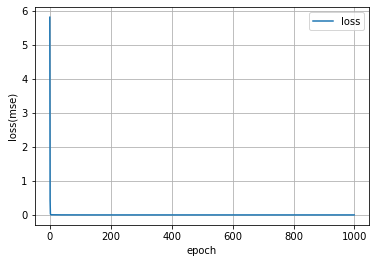

In [7]:
plt.figure(0)
plt.plot(history, label='loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss(mse)')
plt.show()